# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [80]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from sklearn import datasets

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(str(len(cities)) + " " + cities[0] + " " + cities[len(cities)-1])

584 belushya guba kefamenanu


In [4]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "Imperial"

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [8]:
response = requests.get(query_url + cities[3]).json()
response

{'coord': {'lon': -68.3, 'lat': -54.8},
 'weather': [{'id': 802,
   'main': 'Clouds',
   'description': 'scattered clouds',
   'icon': '03d'}],
 'base': 'stations',
 'main': {'temp': 35.6,
  'feels_like': 19.65,
  'temp_min': 35.6,
  'temp_max': 35.6,
  'pressure': 995,
  'humidity': 86},
 'visibility': 10000,
 'wind': {'speed': 21.92, 'deg': 230},
 'clouds': {'all': 40},
 'dt': 1595785539,
 'sys': {'type': 1,
  'id': 8303,
  'country': 'AR',
  'sunrise': 1595766696,
  'sunset': 1595796454},
 'timezone': -10800,
 'id': 3833367,
 'name': 'Ushuaia',
 'cod': 200}

In [6]:
# set up lists to hold reponse info
city_name = []
cloudiness = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []
country = []
record_count = 0

# Loop through the list of cities and perform a request for data on each
for city in cities:
    record_count = record_count + 1
    response = requests.get(query_url + city).json()
    try:
        city_name.append(response['name'])
        cloudiness.append(response['clouds']['all'])
        date.append(response['dt'])
        humidity.append(response['main']['humidity'])
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        max_temp.append(response['main']['temp_max'])
        wind_speed.append(response['wind']['speed'])
        country.append(response['sys']['country'])
        print("Processing Record " + str(record_count) + " | " + city)  
    except:
        print("Processing Record " + str(record_count) + " | " + city + " not found") 


Processing Record 1 | belushya guba not found
Processing Record 2 | castro
Processing Record 3 | port hedland
Processing Record 4 | ushuaia
Processing Record 5 | susanville
Processing Record 6 | okhotsk
Processing Record 7 | beli potok
Processing Record 8 | tuktoyaktuk
Processing Record 9 | east london
Processing Record 10 | shenjiamen
Processing Record 11 | busselton
Processing Record 12 | jacqueville
Processing Record 13 | rikitea
Processing Record 14 | butaritari
Processing Record 15 | chihuahua
Processing Record 16 | nishihara
Processing Record 17 | hatillo
Processing Record 18 | varaklani not found
Processing Record 19 | kaduy
Processing Record 20 | egvekinot
Processing Record 21 | punta arenas
Processing Record 22 | esperance
Processing Record 23 | geraldton
Processing Record 24 | montepuez
Processing Record 25 | ribeira grande
Processing Record 26 | sungairaya
Processing Record 27 | yellowknife
Processing Record 28 | deputatskiy
Processing Record 29 | tasiilaq
Processing Record 

Processing Record 241 | nikolskoye
Processing Record 242 | salsk
Processing Record 243 | sidvokodvo
Processing Record 244 | villazon
Processing Record 245 | burnie
Processing Record 246 | cururupu
Processing Record 247 | bukoba
Processing Record 248 | tiksi
Processing Record 249 | tikhvin
Processing Record 250 | peniche
Processing Record 251 | norman wells
Processing Record 252 | fukuma
Processing Record 253 | abbeville
Processing Record 254 | tonj
Processing Record 255 | hearst
Processing Record 256 | opuwo
Processing Record 257 | alta gracia
Processing Record 258 | broken hill
Processing Record 259 | san patricio
Processing Record 260 | restrepo
Processing Record 261 | solnechnyy
Processing Record 262 | soledade
Processing Record 263 | walvis bay
Processing Record 264 | nizhneyansk not found
Processing Record 265 | yarim
Processing Record 266 | santa rosa
Processing Record 267 | fukue
Processing Record 268 | lac du bonnet
Processing Record 269 | hobyo
Processing Record 270 | longyear

Processing Record 483 | port lincoln
Processing Record 484 | komsomolskiy
Processing Record 485 | bosaso
Processing Record 486 | voh
Processing Record 487 | poum
Processing Record 488 | bam
Processing Record 489 | teya
Processing Record 490 | hals
Processing Record 491 | liepaja
Processing Record 492 | barawe not found
Processing Record 493 | traverse city
Processing Record 494 | palabuhanratu not found
Processing Record 495 | chuguyevka
Processing Record 496 | hakvik not found
Processing Record 497 | sur
Processing Record 498 | imbituba
Processing Record 499 | ayan
Processing Record 500 | valverde del camino
Processing Record 501 | fort nelson
Processing Record 502 | chatellerault
Processing Record 503 | barra do garcas
Processing Record 504 | micomeseng
Processing Record 505 | cagayan de tawi-tawi not found
Processing Record 506 | berdsk
Processing Record 507 | miracema do tocantins
Processing Record 508 | yeppoon
Processing Record 509 | fairbanks
Processing Record 510 | salinopolis


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [9]:
# Create DataFrame
city_weather = pd.DataFrame({
    'City': city_name,
    'Lat': lat,
    'Lng': lng, 
    'Max Temp': max_temp,
    'Humidity': humidity,
    'Cloudiness': cloudiness, 
    'Wind Speed': wind_speed,
    'Country': country,
    'Date': date})
city_weather.count(axis='rows')

City          530
Lat           530
Lng           530
Max Temp      530
Humidity      530
Cloudiness    530
Wind Speed    530
Country       530
Date          530
dtype: int64

In [10]:
city_weather.head(5)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Castro,-24.79,-50.01,69.62,58,100,3.02,BR,1595785538
1,Port Hedland,-20.32,118.57,59.00,24,17,9.17,AU,1595785533
2,Ushuaia,-54.80,-68.30,35.60,86,40,21.92,AR,1595785539
3,Susanville,40.42,-120.65,84.99,19,1,4.70,US,1595785541
4,Okhotsk,59.38,143.30,50.13,86,1,5.28,RU,1595785541


In [12]:
city_weather.to_csv("../output_data/cities_ARD.csv")

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [13]:
city_weather.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,530.00000,530.000000,530.000000,530.000000,530.000000,530.000000,5.300000e+02
mean,19.65800,16.837679,69.972019,68.877358,48.560377,8.183981,1.595786e+09
std,34.06138,91.610949,14.495492,20.958282,36.448233,5.689879,8.238090e+01
min,-54.80000,-179.170000,35.010000,3.000000,0.000000,0.270000,1.595785e+09
25%,-9.53250,-64.222500,58.900000,58.000000,17.250000,4.145000,1.595786e+09
50%,23.36500,22.205000,70.645000,74.000000,40.000000,6.930000,1.595786e+09
75%,49.77250,98.322500,80.600000,85.000000,86.000000,11.247500,1.595786e+09
max,78.22000,179.320000,107.010000,100.000000,100.000000,55.990000,1.595786e+09


In [14]:
#  Get the indices of cities that have humidity over 100%.
# skipping step as none of the cities have humidity over 100%

In [15]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


In [16]:
# Extract relevant fields from the data frame
# Export the City_Data into a csv
# skipping step as none of the cities have humidity over 100%

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

Text(0, 0.5, 'Max Temperature (F)')

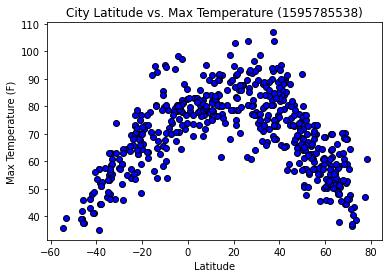

In [20]:
x_axis = city_weather["Lat"]
y_axis = city_weather["Max Temp"]

plt.scatter(x_axis, y_axis, marker="o", facecolors="blue", edgecolors="black")
plt.title("City Latitude vs. Max Temperature (" + str(city_weather["Date"][0]) + ")")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")

## Latitude vs. Humidity Plot

Text(0, 0.5, 'Humidity (%)')

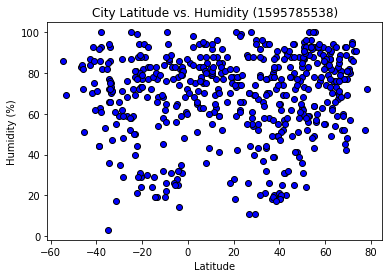

In [21]:
x_axis = city_weather["Lat"]
y_axis = city_weather["Humidity"]

plt.scatter(x_axis, y_axis, marker="o", facecolors="blue", edgecolors="black")
plt.title("City Latitude vs. Humidity (" + str(city_weather["Date"][0]) + ")")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

## Latitude vs. Cloudiness Plot

Text(0, 0.5, 'Cloudiness (%)')

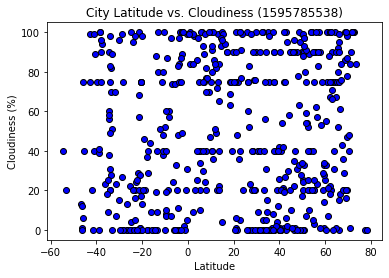

In [22]:
x_axis = city_weather["Lat"]
y_axis = city_weather["Cloudiness"]

plt.scatter(x_axis, y_axis, marker="o", facecolors="blue", edgecolors="black")
plt.title("City Latitude vs. Cloudiness (" + str(city_weather["Date"][0]) + ")")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

## Latitude vs. Wind Speed Plot

Text(0, 0.5, 'Wind Speed (mph)')

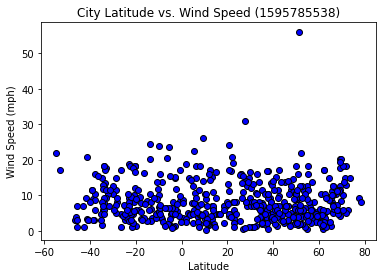

In [23]:
x_axis = city_weather["Lat"]
y_axis = city_weather["Wind Speed"]

plt.scatter(x_axis, y_axis, marker="o", facecolors="blue", edgecolors="black")
plt.title("City Latitude vs. Wind Speed (" + str(city_weather["Date"][0]) + ")")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")

## Linear Regression

In [93]:
# OPTIONAL: Create a function to create Linear Regression plots

In [94]:
# Create Northern and Southern Hemisphere DataFrames
northern_df = city_weather[city_weather.Lat > 0]
southern_df = city_weather[city_weather.Lat <= 0]


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.4916763106308609


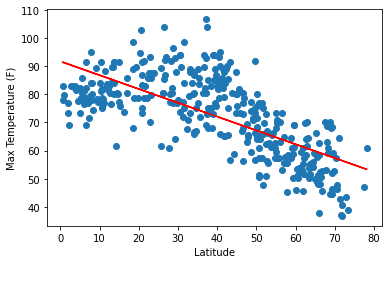

In [86]:
x_values = northern_df["Lat"]
y_values = northern_df["Max Temp"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
print(f"The r-squared is: {rvalue**2}")
plt.show()


####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.6712071480777235


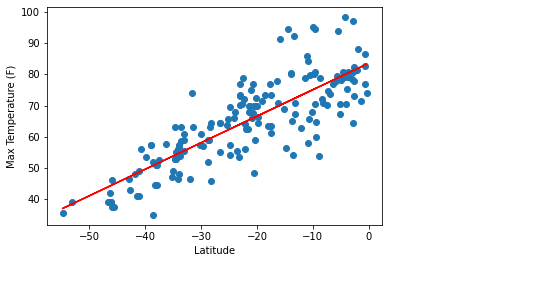

In [85]:
x_values = southern_df["Lat"]
y_values = southern_df["Max Temp"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.0015736181501327736


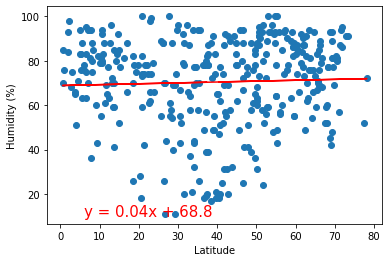

In [84]:
x_values = northern_df["Lat"]
y_values = northern_df["Humidity"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.035433552161751154


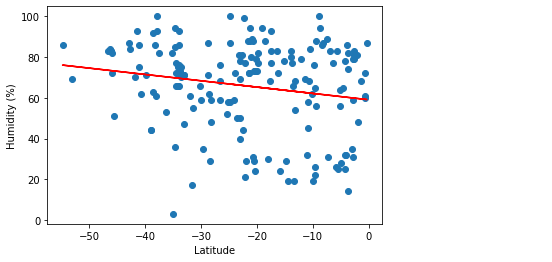

In [87]:
x_values = southern_df["Lat"]
y_values = southern_df["Humidity"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.005892890728867439


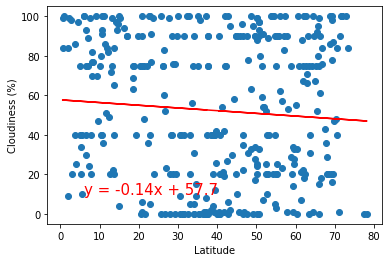

In [88]:
x_values = northern_df["Lat"]
y_values = northern_df["Cloudiness"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 1.585850005002992e-06


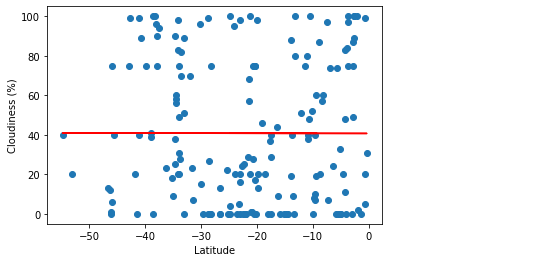

In [89]:
x_values = southern_df["Lat"]
y_values = southern_df["Cloudiness"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 9.175791613201065e-05


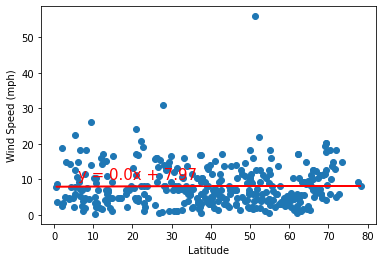

In [91]:
x_values = northern_df["Lat"]
y_values = northern_df["Wind Speed"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.004000635390143169


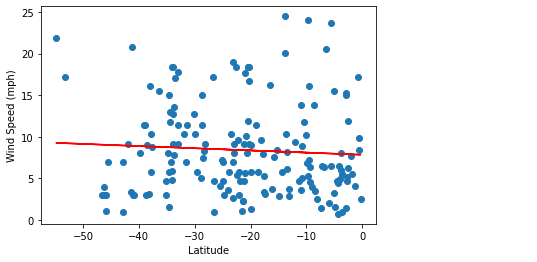

In [92]:
x_values = southern_df["Lat"]
y_values = southern_df["Wind Speed"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
print(f"The r-squared is: {rvalue**2}")
plt.show()